In [44]:
import cv2
import pandas as pd 
import numpy as np 
import time 

import matplotlib.pyplot as plt 
import seaborn as sns 

In [45]:
col_list = ["frame_number", "identity_number", "left", "top", "width", "height", "score", "class", "visibility"]
df = pd.read_csv("gt.txt", names=col_list)
df.head()

,frame_number,identity_number,left,top,width,height,score,class,visibility
0,1,1,1376,485,37,28,0,11,1.0
1,2,1,1379,486,37,28,0,11,1.0
2,3,1,1382,487,38,29,0,11,1.0
3,4,1,1386,488,38,29,0,11,1.0
4,5,1,1389,490,38,29,0,11,1.0


<AxesSubplot: ylabel='count'>

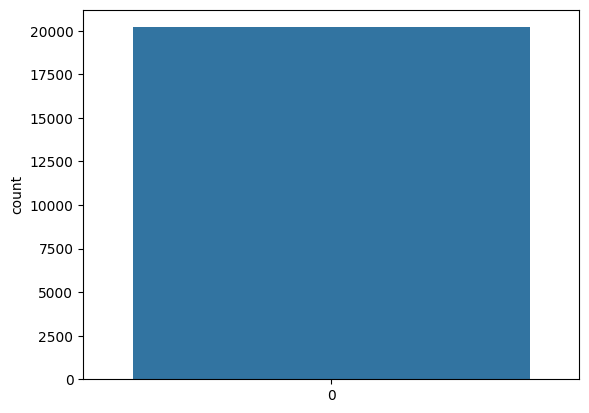

In [46]:
plt.figure()
sns.countplot(df["class"])


In [47]:
car = df[df["class"] == 3]


In [48]:
videoPath = "/Users/furkandurmus/Desktop/Computer Vision/Nesne-Takibi /MOT17-13-SDP.mp4"
cap = cv2.VideoCapture(videoPath)


id1 = 29
fps = 25
numberofImage = np.max(df["frame_number"])
bound_box_list = []

for i in range(numberofImage - 1): 

    ret, frame = cap.read()

    if ret: 

        frame = cv2.resize(frame, dsize=(960, 540))

        filter_id1 = np.logical_and(car["frame_number"] == i+1, car["identity_number"] == id1)
        
        if len(car(filter_id1) != 0): 

            x = int(car[filter_id1].left.values[0]/2)
            y = int(car[filter_id1].top.values[0]/2)
            w = int(car[filter_id1].width.values[0]/2)
            h = int(car[filter_id1].height.values[0]/2)

            cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,255), 2) 
            cv2.circle(frame, int(x+w/2), int(y+h/2), 2, (0,255,255), -1)

            bound_box_list.append([i, x,y,w,h, int(x+w/2), int(y+h/2)])
        cv2.putText(frame, "Frame num:"+str(i+1), (10,30), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,1,(0,0,255),2)
        cv2.imshow("frame", frame)

        if cv2.waitKey(1) & 0xFF == ord("q"): 
            break

    else: 
        break

cap.release()
cv2.destroyAllWindows()

df = pd.DataFrame(bound_box_list, columns = ["frame_no", "x", "y", "w", "h", "center_x", "center_y"])
df.to_csv("gt_new.txt",index=False)


OpenCV: Couldn't read video stream from file "/Users/furkandurmus/Desktop/Computer Vision/Nesne-Takibi /MOT17-13-SDP.mp4"
